In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Exercise - 1:

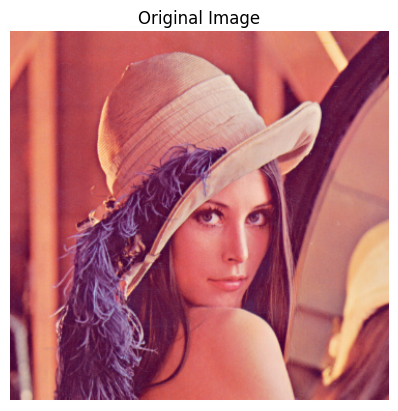

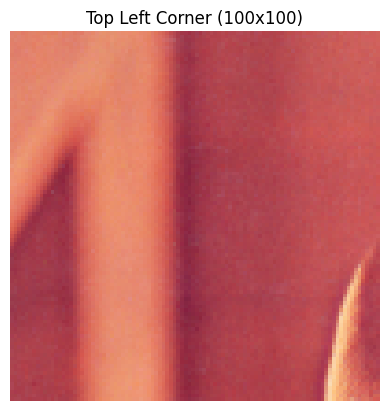

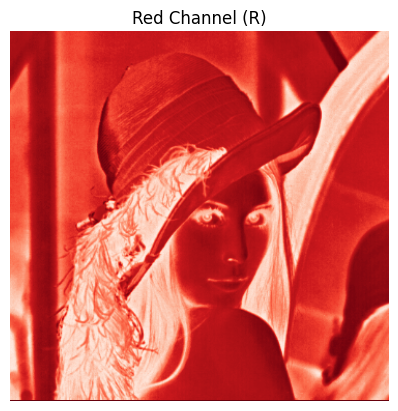

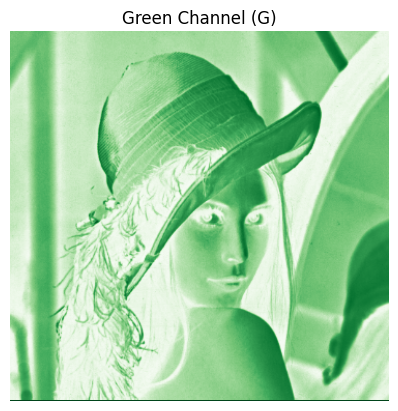

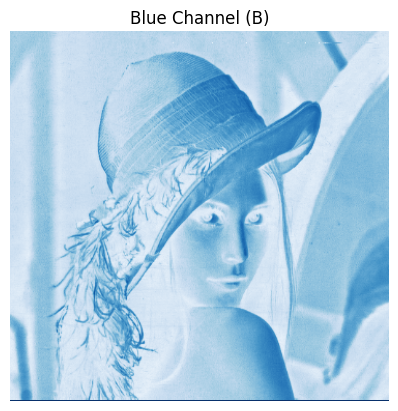

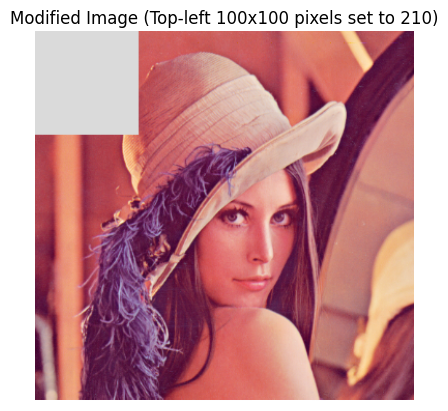

In [ ]:
#1. Read and display the image.

def read_and_display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()
    return image

#2. Display only the top left corner of 100x100 pixels.
def display_top_left_corner(image):
    image_array = np.array(image)
    top_left_corner = image_array[:100, :100]
    plt.imshow(top_left_corner)
    plt.title("Top Left Corner (100x100)")
    plt.axis("off")
    plt.show()

#3. Show the three color channels (R, G, B).
def display_color_channels(image):
    image_array = np.array(image)


    R = image_array[:, :, 0]
    plt.imshow(R, cmap='Reds')
    plt.title("Red Channel (R)")
    plt.axis("off")
    plt.show()


    G = image_array[:, :, 1]
    plt.imshow(G, cmap='Greens')
    plt.title("Green Channel (G)")
    plt.axis("off")
    plt.show()

    B = image_array[:, :, 2]
    plt.imshow(B, cmap='Blues')
    plt.title("Blue Channel (B)")
    plt.axis("off")
    plt.show()

#4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
def modify_top_left_corner(image):
    image_array = np.array(image)
    image_array[:100, :100] = 210
    modified_image = Image.fromarray(image_array)
    plt.imshow(modified_image)
    plt.title("Modified Image (Top-left 100x100 pixels set to 210)")
    plt.axis("off")
    plt.show()

def main(image_path):
    image = read_and_display_image(image_path)
    display_top_left_corner(image)
    display_color_channels(image)
    modify_top_left_corner(image)

image_path = '/content/drive/MyDrive/AI-ML/lenna_image.png'
main(image_path)


# Exercise - 2:

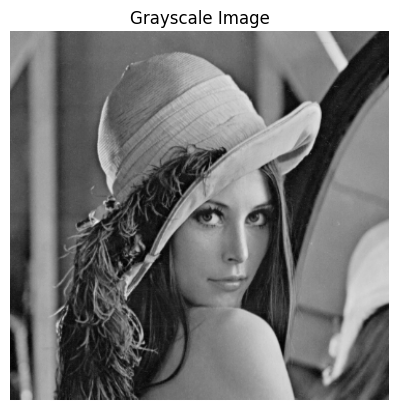

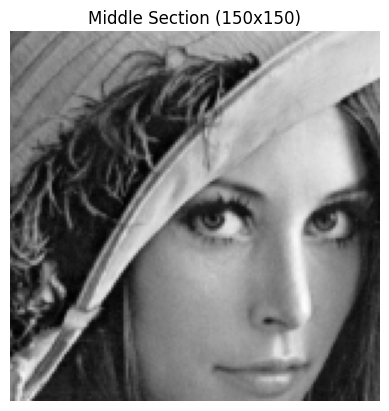

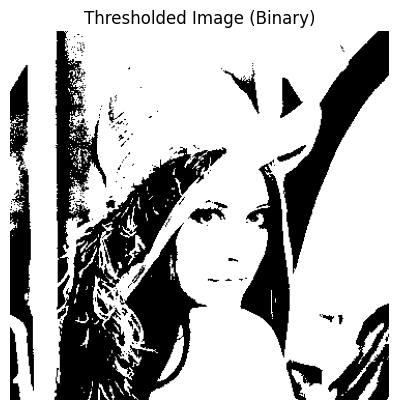

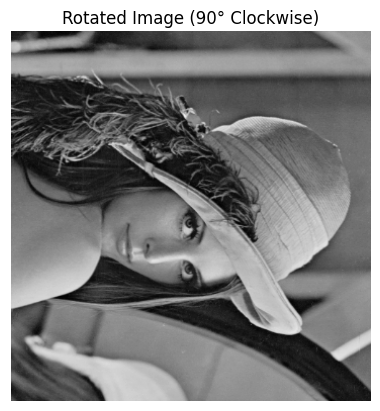

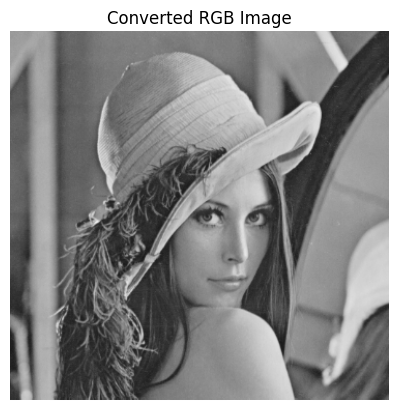

In [ ]:
#1. Load and display a grayscale image.
def load_and_display_grayscale(image_path):
    image = Image.open(image_path).convert("L")
    plt.imshow(image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()
    return image

#2. Extract and display the middle section of the image (150 pixels).
def display_middle_section(image):
    image_array = np.array(image)
    height, width = image_array.shape
    start_row = (height - 150) // 2
    start_col = (width - 150) // 2
    middle_section = image_array[start_row:start_row+150, start_col:start_col+150]
    plt.imshow(middle_section, cmap='gray')
    plt.title("Middle Section (150x150)")
    plt.axis("off")
    plt.show()

#3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
def apply_threshold(image):
    image_array = np.array(image)
    thresholded_image = np.where(image_array < 100, 0, 255)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title("Thresholded Image (Binary)")
    plt.axis("off")
    plt.show()

#4. Rotate the image 90 degrees clockwise and display the result.
def rotate_image(image):
    rotated_image = image.rotate(-90, expand=True)
    plt.imshow(rotated_image, cmap='gray')
    plt.title("Rotated Image (90° Clockwise)")
    plt.axis("off")
    plt.show()

#5. Convert the grayscale image to an RGB image.
def convert_to_rgb(image):
    rgb_image = image.convert("RGB")
    plt.imshow(rgb_image)
    plt.title("Converted RGB Image")
    plt.axis("off")
    plt.show()


def main(image_path):
    image = load_and_display_grayscale(image_path)
    display_middle_section(image)
    apply_threshold(image)
    rotate_image(image)
    convert_to_rgb(image)

image_path = '/content/drive/MyDrive/AI-ML/lenna_image.png'
main(image_path)


# 3. Image Compression and Decompression using PCA.

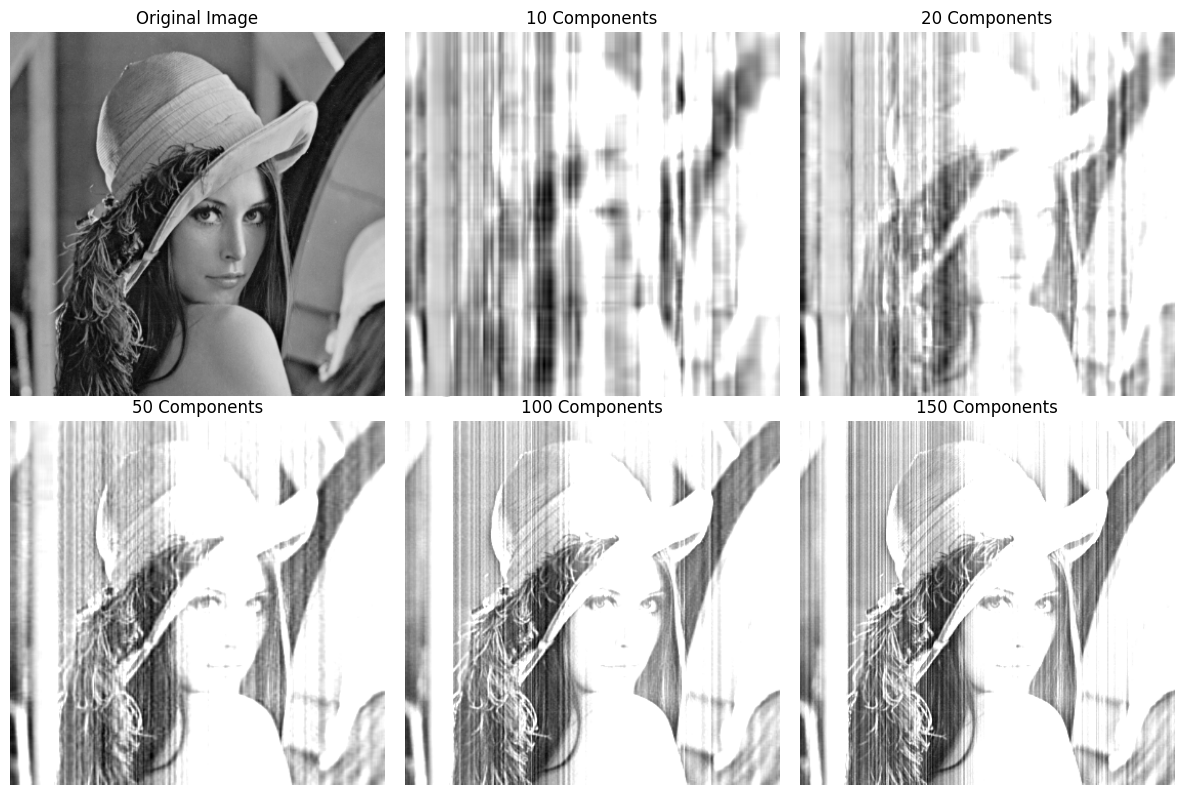

In [ ]:
#1. Load and Prepare Data:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#converting image to grayscale
def load_grayscale_image(image_path):
    image = Image.open(image_path).convert("L")
    image_array = np.array(image, dtype=np.float64)
    return image_array

#standaridzing the data
def standardize_data(image_array):
    mean = np.mean(image_array, axis=0)
    standardized_data = image_array - mean
    return standardized_data, mean

#Calculating the covaraince matrix of the Standaridze data.
def compute_pca(data):
    covariance_matrix = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    return eigenvalues, eigenvectors

#• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-tors(PCs) to obtain a lower-dimensional representation.
def reconstruct_image(data, mean, eigenvectors, num_components):
    top_eigenvectors = eigenvectors[:, :num_components]
    reduced_data = np.dot(data, top_eigenvectors)
    reconstructed_data = np.dot(reduced_data, top_eigenvectors.T) + mean
    reconstructed_data = np.clip(reconstructed_data, 0, 255)
    return reconstructed_data

def display_results(image_array, mean, eigenvectors):
    num_components_list = [10, 20, 50, 100, 150]

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes[0, 0].imshow(image_array, cmap="gray")
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis("off")

#Experiments: Pick Four different combination of principal components with various ex-plained variance value and compare the result.
    for i, num_components in enumerate(num_components_list):
        reconstructed_image = reconstruct_image(image_array, mean, eigenvectors, num_components)
        ax = axes[(i + 1) // 3, (i + 1) % 3]
        ax.imshow(reconstructed_image, cmap="gray")
        ax.set_title(f"{num_components} Components")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

#Display the Results and Evaluate.
def main(image_path):
    image_array = load_grayscale_image(image_path)
    standardized_data, mean = standardize_data(image_array)
    eigenvalues, eigenvectors = compute_pca(standardized_data)
    display_results(image_array, mean, eigenvectors)

image_path = "/content/drive/MyDrive/AI-ML/lenna_image.png"
main(image_path)
